

# Project: Investigate a Dataset - [TMDb Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The **TMDb** data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. At inception, it has a total of 21 columns, namely:
<ol>
    <li>ID- The identification number of the movie</li>
    <li>imdb_ID- The identification number of the movie in the database</li>
    <li>Popularity- A measure of how popular the movie was</li>
    <li>Budget- Cost allocated for production and distribution</li>
    <li>Revenue- Income from the movie</li> 
    <li>Original_title- Title of the movie</li>
    <li>Cast- Actors in the movie</li>
    <li>Homepage- Website that gives a synopsis and trailer of the movie</li>
    <li>Director- Name of the director of the movie</li>
    <li>Tagline- The catch phrase/slogan of the movie</li>
    <li>Keywords- Words that describe the movie</li>
    <li>Overview- A brief summary of the movie</li>
    <li>Runtime- Duration of the movie</li>
    <li>Genre- The style or category of the movie</li>
    <li>Production_companies- Companies who worked on the production of the movie</li>
    <li>Release_date- Date the movie was released</li>
    <li>vote_count- Votes for the movie</li>
    <li>vote_average- The average vote for the movie</li>
    <li>release_year- The year the movie was released</li>
<li>budget_adj- This shows the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
<li>revenue_adj- This shows the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>



### Question(s) for Analysis
<ol>
<li>Who is the director, movie, genre and actor with the highest revenue?</li>
<li>What are the 5 movies with the highest votes?</li>
<li>What are the properties of movies with the highest revenue?</li>
<li>Who are the frequently casted actors?</li>
<li>Are there any observations between the revenue abd budget in the dataset?</li>
<li>What years had the highest revenues?</li>




In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as scn
%matplotlib inline 



<a id='wrangling'></a>
## Data Wrangling


### Loading dataset and checking its properties

In [3]:
df = pd.read_csv('moviess.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Checking for nulls in the data set

In [8]:

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Dropping Null Values

In [9]:

df.dropna(inplace= True)

## Checking that null rows have been dropped

In [10]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

## Checking for Duplicates in the Data Set

In [11]:
df.duplicated().sum()

0


# Data set inspection and proposed changes
#### 1. It is observed that the cast and genre columns have multiple values in each row and will need to be split to access individial elements for analysis

#### 2. Also, not all columns are needed to answer questions proposed, so they will be dropped from the data set

#### 3. The data types have been reviewed and analysis can proceed 


### Dropping some columns not needed for analysis

In [12]:
movie_df= df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'vote_count'], axis= 1)
movie_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,174799923.1,1.385749e+09


### Splitting the genre column

In [13]:

df_genre = df.assign(genres = lambda x: df['genres'].str.split('|')).explode('genres')
df_genre.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08


### Separating movie tiles and the corresponding genres

In [14]:
movie_type= pd.melt(df_genre, id_vars= ['original_title'], value_vars= ['genres'])
movie_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5123 entries, 0 to 5122
Data columns (total 3 columns):
original_title    5123 non-null object
variable          5123 non-null object
value             5123 non-null object
dtypes: object(3)
memory usage: 120.2+ KB


### Using iloc to extract only the movie tiles and the corresponding genres

In [15]:

movie_type= movie_type.iloc[:, [0, 2]] 
movie_type.head()

,original_title,value
0,Jurassic World,Action
1,Jurassic World,Adventure
2,Jurassic World,Science Fiction
3,Jurassic World,Thriller
4,Mad Max: Fury Road,Action


### Renaming the value column to genre 

In [16]:

movie_type.rename(columns= {'value': 'genre'}, inplace= True)
movie_type.head()

,original_title,genre
0,Jurassic World,Action
1,Jurassic World,Adventure
2,Jurassic World,Science Fiction
3,Jurassic World,Thriller
4,Mad Max: Fury Road,Action


### Getting the total sum of each genre in the data set

In [17]:

movie_type['genre'].value_counts()

Drama              838
Comedy             640
Thriller           575
Action             532
Adventure          361
Romance            291
Science Fiction    291
Horror             273
Crime              262
Family             233
Fantasy            202
Animation          170
Mystery            148
Documentary         93
Music               72
History             56
War                 44
Western             20
TV Movie            16
Foreign              6
Name: genre, dtype: int64

### Separating the cast column

In [18]:

df_casts = df.assign(cast = lambda x: df['cast'].str.split('|')).explode('cast')
df_casts.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09


### Separating movie tiles and the corresponding cast

In [19]:

actor_name = pd.melt(df_casts, id_vars= ['original_title'], value_vars= ['cast'])
actor_name.head()

,original_title,variable,value
0,Jurassic World,cast,Chris Pratt
1,Jurassic World,cast,Bryce Dallas Howard
2,Jurassic World,cast,Irrfan Khan
3,Jurassic World,cast,Vincent D'Onofrio
4,Jurassic World,cast,Nick Robinson


### Using iloc to extract only the movie tiles and the corresponding cast

In [20]:


actor_name= actor_name.iloc[:, [0, 2]] 
actor_name.head()

,original_title,value
0,Jurassic World,Chris Pratt
1,Jurassic World,Bryce Dallas Howard
2,Jurassic World,Irrfan Khan
3,Jurassic World,Vincent D'Onofrio
4,Jurassic World,Nick Robinson


### Renaming the value column to actor

In [21]:


actor_name.rename(columns= {'value': 'actor'}, inplace= True)
actor_name.head()

,original_title,actor
0,Jurassic World,Chris Pratt
1,Jurassic World,Bryce Dallas Howard
2,Jurassic World,Irrfan Khan
3,Jurassic World,Vincent D'Onofrio
4,Jurassic World,Nick Robinson


<a id='eda'></a>
## Exploratory Data Analysis






### Reviewing distribution of the data set- Single Variable Analysis using histogram
This was done to get some clarity on individual items in the dataset 

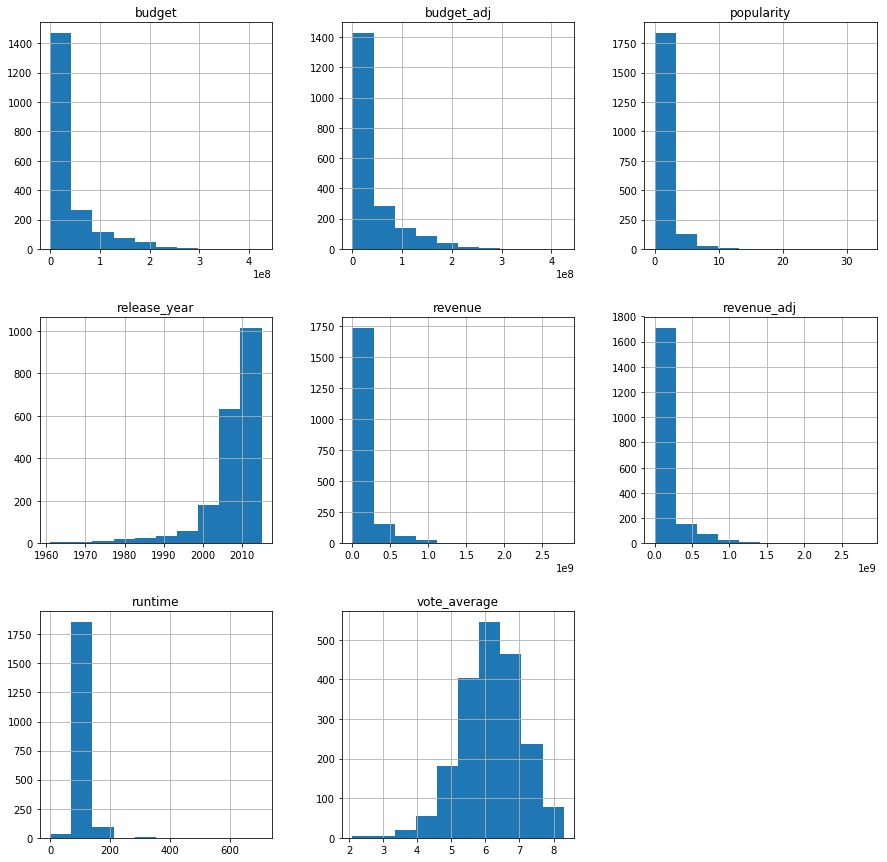

In [22]:
movie_df.hist(figsize=(15,15));

Quick insights from the above show that:
<ol>
    <li> A good number of the budget falls below the 100,000,000 range while the revenue below 500,000,000 range</li>
    <li> A sizeable amount of the movies were released between year 2000 and 2010</li>
    <li> Many movies had a runtime between 100 and 150mins</li>
    <li> The popularity score for most movies was below 5</li>
    <li> A huge portion of the vote average falls between 5.5 and 7.5</li>
        

### Question 1: Which Director, movie, genre and actors have the highest revenues?
To address this, the data set had to be grouped by the directors,movies, genres, actors and their total revenues. After which the largest 10 were selected for visualization. This was done to see the most profitable from these categories

#### Bar graph to get director with highest revenue

count    1.000000e+01
mean     3.977298e+09
std      1.039516e+09
min      3.016686e+09
25%      3.168279e+09
50%      3.627692e+09
75%      4.580038e+09
max      5.943643e+09
Name: revenue, dtype: float64


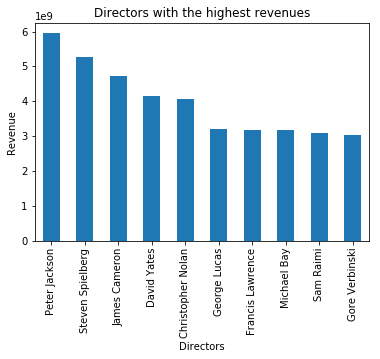

In [23]:


dir_rev = movie_df.groupby('director')['revenue'].sum()
dir_rev.nlargest(n=10).plot(kind='bar', title= 'Directors with the highest revenues');
plt.xlabel('Directors')
plt.ylabel('Revenue')

print(dir_rev.nlargest(n=10).describe())


##### Findings:
The highest 10 revenues from directors were within the range of 3 to 5bn

### Bar graph to get movie with highest revenue


count    1.000000e+01
mean     1.645963e+09
std      4.762032e+08
min      1.215440e+09
25%      1.347122e+09
50%      1.509889e+09
75%      1.763665e+09
max      2.781506e+09
Name: revenue, dtype: float64


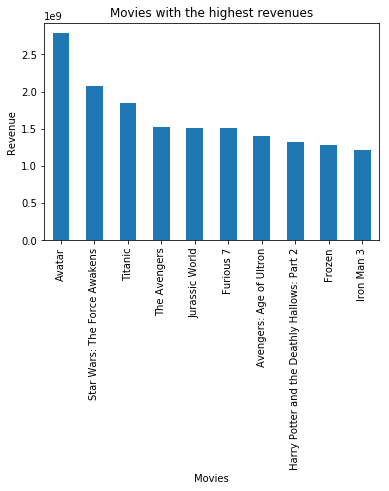

In [24]:


movie_rev = movie_df.groupby('original_title')['revenue'].sum()
movie_rev.nlargest(n=10).plot(kind='bar', title= 'Movies with the highest revenues');

plt.xlabel('Movies')
plt.ylabel('Revenue')
print(movie_rev.nlargest(n=10).describe())

#### Findings:
These movies had revenues between 1.2 and 2.8bn

#### Bar graph to get genres with highest revenue


count    1.000000e+01
mean     6.271143e+10
std      2.740628e+10
min      2.328038e+10
25%      5.421429e+10
50%      5.781114e+10
75%      6.146804e+10
max      1.119904e+11
Name: revenue, dtype: float64


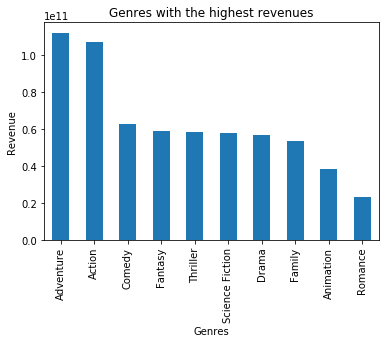

In [25]:


gen_rev = df_genre.groupby('genres')['revenue'].sum()
gen_rev.nlargest(n=10).plot(kind='bar', title= 'Genres with the highest revenues');

plt.xlabel('Genres')
plt.ylabel('Revenue')

print(gen_rev.nlargest(n=10).describe())

### Findings:
The top genres got revenues ranging from 20m to over 100m

count    1.000000e+01
mean     6.314989e+09
std      5.667475e+08
min      5.450010e+09
25%      6.007773e+09
50%      6.145062e+09
75%      6.552746e+09
max      7.445122e+09
Name: revenue, dtype: float64


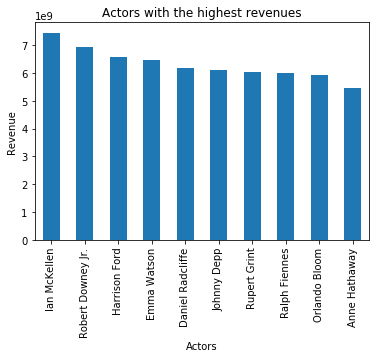

In [26]:
#Bar graph to get actors with highest revenue

act_rev = df_casts.groupby('cast')['revenue'].sum()
act_rev.nlargest(n=10).plot(kind='bar', title= 'Actors with the highest revenues');

plt.xlabel('Actors')
plt.ylabel('Revenue')
print(act_rev.nlargest(n=10).describe())

### Findings:
The top actors had revenues between 500 and 700m

## Question 2: What are the 5 movies with the highest votes?
The data frame was sorted by the vote average column in desecding order to see movies with the highest votes. This was done to show the most prefered movies in the data set and to find out why.

count    5.000000
mean     8.160000
std      0.089443
min      8.100000
25%      8.100000
50%      8.100000
75%      8.200000
max      8.300000
Name: vote_average, dtype: float64


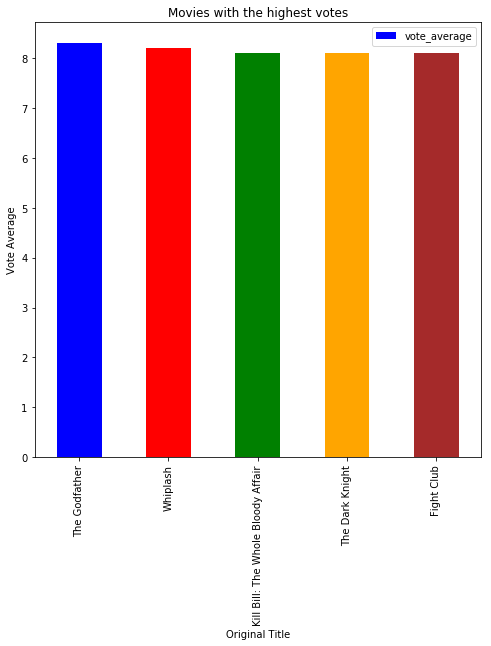

In [27]:
highest_votes=movie_df.sort_values(by=['vote_average'], ascending=False).head(5)
highest_votes

highest_votes.plot(x='original_title', y='vote_average', kind='bar', title= 'Movies with the highest votes', figsize=(8,8), color= ['blue', 'red', 'green', 'orange', 'brown']);
plt.xlabel('Original Title')
plt.ylabel('Vote Average')
print(highest_votes.vote_average.describe())

## Question 3: What are the characteristics of movies with the highest revenue? 
The dataset was grouped by movie titles and total revenue to get the top 10, after which corresponding columns of each movies were analysed to see similarities 

In [28]:
movie_rev = movie_df.groupby('original_title')['revenue'].sum()
movie_rev.nlargest(n=10)


original_title
Avatar                                          2781505847
Star Wars: The Force Awakens                    2068178225
Titanic                                         1845034188
The Avengers                                    1519557910
Jurassic World                                  1513528810
Furious 7                                       1506249360
Avengers: Age of Ultron                         1405035767
Harry Potter and the Deathly Hallows: Part 2    1327817822
Frozen                                          1277284869
Iron Man 3                                      1215439994
Name: revenue, dtype: int64

In [29]:

print(movie_rev.nlargest(n=10).describe())

count    1.000000e+01
mean     1.645963e+09
std      4.762032e+08
min      1.215440e+09
25%      1.347122e+09
50%      1.509889e+09
75%      1.763665e+09
max      2.781506e+09
Name: revenue, dtype: float64


### Getting full info on rows with these movies so that similar attributes can be compared 

In [30]:

movie_df.query('original_title == "Frozen"')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
2102,0.538392,0,3065860,Frozen,Emma Bell|Shawn Ashmore|Kevin Zegers|Ed Ackerm...,Adam Green,93,Thriller,ArieScope Pictures|A Bigger Boat,5.8,2010,0.0,3.065860e+06
5422,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,7.5,2013,140405002.9,1.192711e+09


In [31]:
 movie_df.query('original_title == "Iron Man"')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
2877,4.977955,140000000,585174222,Iron Man,Robert Downey Jr.|Terrence Howard|Jeff Bridges...,Jon Favreau,126,Action|Science Fiction|Adventure,Marvel Studios,7.3,2008,141790128.7,592656630.5


In [32]:
 movie_df.query('original_title == "Avatar"')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,7.1,2009,240886902.9,2.827124e+09


In [33]:
 movie_df.query('original_title == "Star Wars: The Force Awakens"')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,183999919.0,1.902723e+09


In [34]:
 movie_df.query('original_title == "Titanic"')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,7.3,1997,271692064.2,2.506406e+09


In [35]:
 movie_df.query('original_title == "The Avengers"')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,7.3,2012,208943741.9,1.443191e+09


In [36]:
 movie_df.query('original_title == "Jurassic World"')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,137999939.3,1.392446e+09


In [37]:
 movie_df.query('original_title == "Furious 7"')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,174799923.1,1.385749e+09


In [38]:
 movie_df.query('original_title == "Avengers: Age of Ultron"')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,7.4,2015,257599886.7,1.292632e+09


In [39]:
 movie_df.query('original_title == "Harry Potter and the Deathly Hallows: Part 2"')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7.7,2011,121174755.3,1.287184e+09


### Findings
Their runtimes ranged from 93 minutes to 194 minutes, vote averages from 5.8 to 7.5 and release dates were majorly between 2008 and 2015

## Question 4: Who are the frequently casted actors?
This analysis was done to get actors with highest screen times, to determine the most loved by the market/directors

Matt Damon           23
Samuel L. Jackson    20
Mark Wahlberg        20
Ryan Reynolds        19
Jason Statham        17
Name: actor, dtype: int64


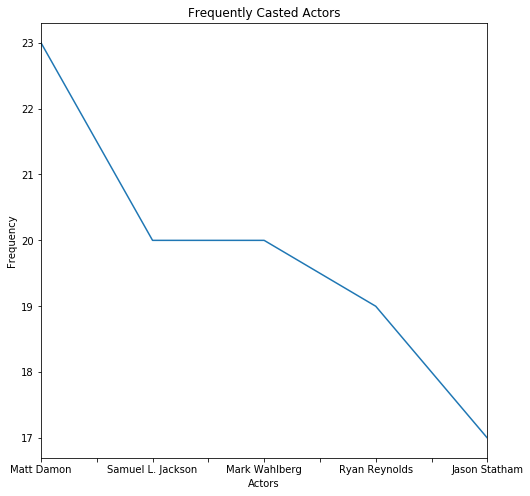

In [40]:

actor_name['actor'].value_counts().head(5).plot(kind = 'line', figsize=(8,8), title= 'Frequently Casted Actors');
plt.xlabel('Actors')
plt.ylabel('Frequency')
print(actor_name['actor'].value_counts().head())

### Findings
The feedback from the top 5 was reviewed and the highest casted actor was featured 23 times

## Question 5: Are there any observations between the budget and revenue in the dataset?
This was done to determine if the proposed budget had any impact on the revenues generated 

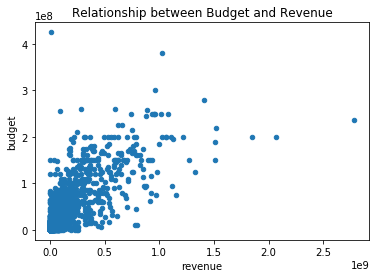

In [41]:

movie_df.plot (x= 'revenue', y='budget', kind='scatter', title = 'Relationship between Budget and Revenue');

In [42]:
g_df= df_genre.groupby('genres')['revenue', 'budget'].sum()
g_df

,revenue,budget
genres,,
Action,107167633377,33037522675
Adventure,111990405311,30066276661
Animation,37974562398,10375671130
Comedy,62405814249,19453579966
Crime,23192149692,8652363247
Documentary,473774273,166393148
Drama,56599144321,19235851813
Family,53419335026,14834710401
Fantasy,58654720007,16239894822


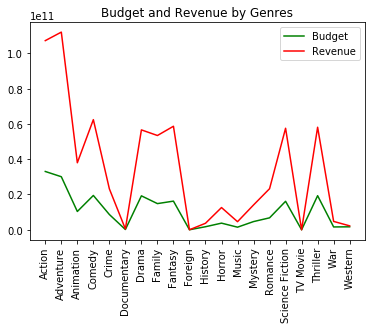

            revenue        budget
count  2.000000e+01  2.000000e+01
mean   3.463647e+10  1.046266e+10
std    3.483079e+10  1.012281e+10
min    0.000000e+00  5.200000e+06
25%    4.366611e+09  1.668125e+09
50%    2.323626e+10  7.713513e+09
75%    5.766690e+10  1.698888e+10
max    1.119904e+11  3.303752e+10


In [43]:
x= g_df['budget']
y= g_df['revenue']


plt.title('Budget and Revenue by Genres')
plt.plot(x, 'g', label='Budget')
plt.plot(y, 'r', label='Revenue')
plt.xticks(rotation = 90)


plt.legend()
plt.show()

print(g_df.describe())

### Findings
There is a positive correlation between budget and revenue, increased budget resulted in increased revenue for most cases 

## Question 6: What years had the highest revenues?
This was done by grouping the data by release year and the sum of revenue from the years. This was done to determine the most profitable years

In [44]:
yearly_rev = movie_df.groupby('release_year')['revenue'].sum()
yearly_rev

release_year
1961        4000000
1962       59600000
1963       78898765
1964      125900549
1965      141195658
1967      111584787
1969       81974493
1970              0
1971      183546000
1972      245066411
1973      603083981
1974       97572000
1975      588575267
1976              0
1977      960836680
1978      289321952
1979      462410148
1980      559778361
1981      731664919
1982      839462062
1983     1019662147
1984      735328023
1985      565238643
1986       11000000
1987      457442146
1988       37806332
1989     1002823860
1990      857978520
1991      384785279
1992     1177124601
1993     1497504993
1994     1090599528
1995     1216781406
1996     1691178642
1997     3309836793
1998     1344629235
1999     4975209237
2000     2086840750
2001     4313328186
2002     5544886795
2003     5475716851
2004     8344079454
2005     6147956869
2006     9394297297
2007    15298114456
2008    12375548023
2009    19013761470
2010    18926009660
2011    21695961547
2012   

count    1.000000e+01
mean     1.700566e+10
std      4.035210e+09
min      9.394297e+09
25%      1.542614e+10
50%      1.757129e+10
75%      1.899182e+10
max      2.240011e+10
Name: revenue, dtype: float64


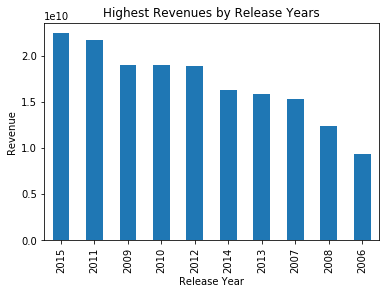

In [45]:
yearly_rev.nlargest(n=10).plot(kind='bar', title= 'Highest Revenues by Release Years');
plt.xlabel('Release Year')
plt.ylabel('Revenue')
print(yearly_rev.nlargest(n=10).describe())

### Findings:
Years with the highest revenues were between 2006 and 2015. Revenues were between 9m and 20m

<a id='conclusions'></a>
## Conclusions


From the above, the following can be deduced:
<ol>
    <li>The directors with the highest revenues raked in revenues ranging from 3bn to 5bn</li>
     <li> The movies with the highest revenues are Avatar, Star Wars: The Force Awakens, Titanic, The Avengers, Jurassic World, Furious 7, Avengers: Age of Ultron, Harry Potter and the Deathly Hallows: Part 2, Iron Man. Revenues raked ranged from 1bn to 2bn</li>
    <li> The genres with the highest revenue are: Adventure, Action, Comedy, Fantasy, Thriller, Science Fiction, Drama, Family, Animation, Romance and raked in revenues ranging from 23bn to 111bn</li>
    <li> The cast with the highest revenues had revenues between 5bn and 7bn</li>
     <li> For the movies with the highest revenue, it was noticed that they had runtimes ranging from 93minutes to 194minutes, vote averages ranging from 5.8 to 7.5 and were released majorly between 2008 and 2015. only one was released in 1997.</li>
    <li> There is a positive relationship between the budget and revenue of the data set </li>
    <li> For frequency of casting, it was noticed that the frequently used actors were casted between 17 and 23 times over the years</li>
    <li> Most revenues from the genres were higher than the planned budgets except for Documentary, Foreign, TV Movie and Western. Based on this we can assume that these genres are not very profitable</li>
    <li> Movies release between the period of 2006 and 2015 were responsible for the highest revenues</li>
    
    


## Limitations

From the above, the following are identified as limitations of this data set, the analysis and its findings:
<ol>
    <li> The dataset has only 10,000 movies within 54 years, thereby not having enough information to give a true picture of the movie industry</li>
    <li> For this analysis we made use of directors and their revenues and about 44 records were missing. These were dropped before the analysis and there is a probability that if present, the analysis would have had another outcome. Other missing data were not used for this part analysis due to the questions formulated. However, this poses a risk of incomplete information for the full analysis of this data set</li>
<li> It was noticed that the movies with the highest votes were not the movies with the highest revenue and further information/analysis is required to determine the reason for this.</li>
 <li> For this analysis, we majorly used revenue as a basis of comparison betweeen various categories like Directors, Cast, Genre, Movies; this benchmark is not conclusive to gauge variances in revenues generated. Further statistical tests that includes other variables in the data set can be done to determine this</li>

## References


Google was used to search for clarity on certain methods used for the analysis of this dataset 

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0